In [1]:
# Load modules
from __future__ import print_function
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
import statsmodels.tsa.api as smtsa


In [2]:
# Function to plot signal, ACF and PACF
def plotds(xt, nlag=30, fig_size=(12, 10)):
    if not isinstance(xt, pd.Series):
         xt = pd.Series(xt)
    plt.figure(figsize=fig_size)
    layout = (2, 2)
    
    # Assign axes
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan=2)
    ax_acf= plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    # Plot graphs
    xt.plot(ax=ax_xt)
    ax_xt.set_title('Time Series')
    plot_acf(xt, lags=50, ax=ax_acf)
    plot_pacf(xt, lags=50, ax=ax_pacf)
    plt.tight_layout()
    return None

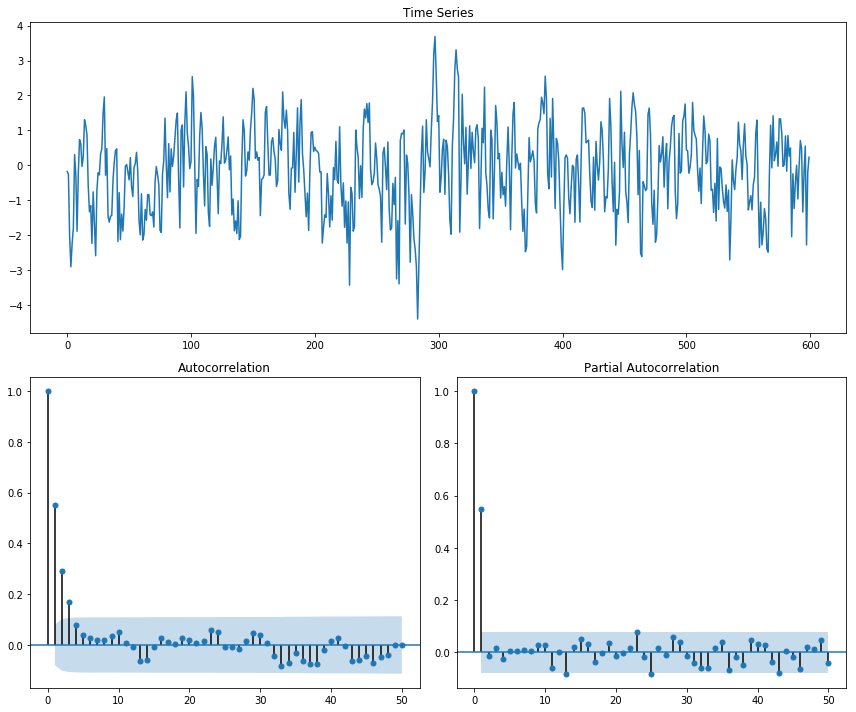

In [3]:
# numpy.r_ does row-wise merging

# Number of samples
n = 600

# Generate AR(1) dataset
ar = np.r_[1, -0.6]
ma = np.r_[1, 0]
ar1_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar1_data)

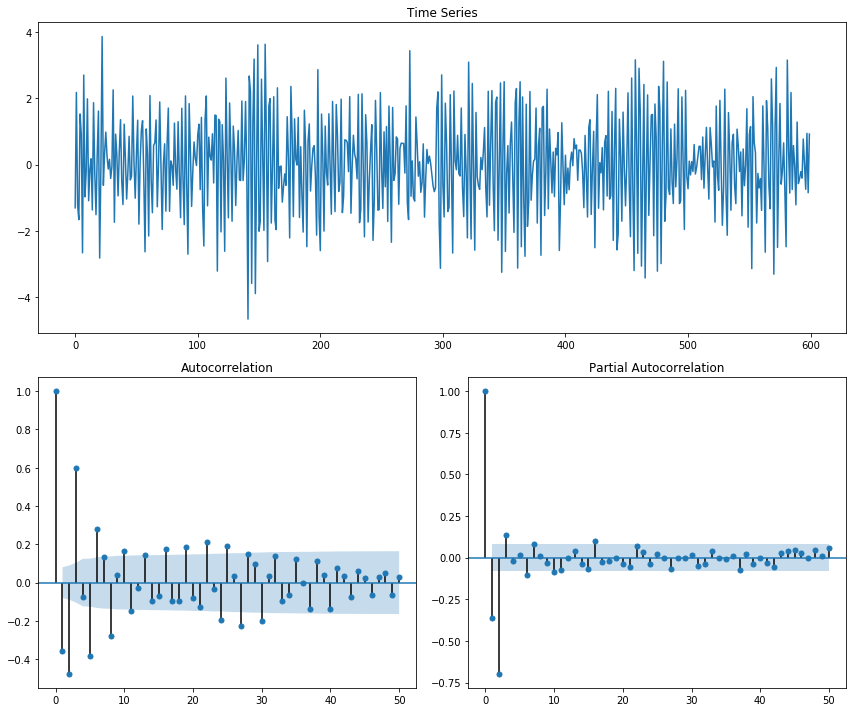

In [4]:
# Generate AR(2) dataset
ar = np.r_[1, 0.6, 0.7]
ma = np.r_[1, 0]
ar2_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar2_data)

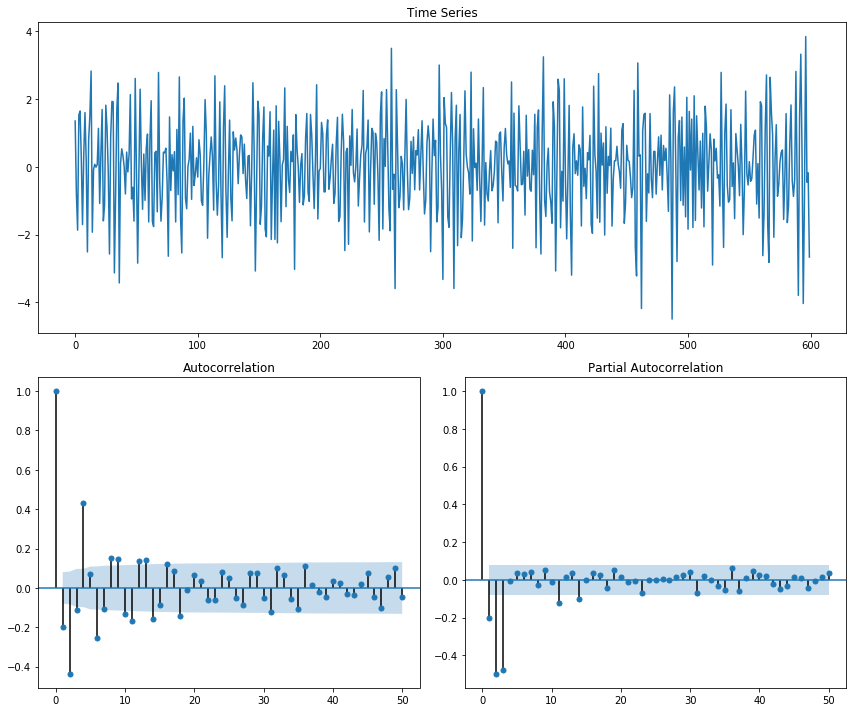

In [5]:
# Generate AR(3) dataset
ar = np.r_[1, 0.6, 0.7, 0.5]
ma = np.r_[1, 0]
ar3_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar3_data)

In [6]:
# Build AR(1) model
ar1model = smtsa.ARMA(ar1_data.tolist(), order=(1, 0))
ar1=ar1model.fit(maxlag=30, method='mle', trend='nc')
ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(1, 0)   Log Likelihood                -854.074
Method:                           mle   S.D. of innovations              1.004
Date:                Mon, 19 Aug 2019   AIC                           1712.147
Time:                        13:05:45   BIC                           1720.941
Sample:                             0   HQIC                          1715.570
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.5549      0.034     16.374      0.000       0.488       0.621
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.8022           +0.0000j            1.8022            0.0000
-----------------------------------------------------------------------------
"""

In [7]:
# Build MA(3) model
ar3 = smtsa.ARMA(ar3_data.tolist(), order=(3, 0)).fit(
    maxlag=30, method='mle', trend='nc')
ar3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(3, 0)   Log Likelihood                -875.439
Method:                           mle   S.D. of innovations              1.040
Date:                Mon, 19 Aug 2019   AIC                           1758.878
Time:                        13:06:25   BIC                           1776.466
Sample:                             0   HQIC                          1765.725
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y       -0.5426      0.036    -15.094      0.000      -0.613      -0.472
ar.L2.y       -0.6442      0.033    -19.583      0.000      -0.709      -0.580
ar.L3.y       -0.4827      0.036    -13.446      0.000      -0.553      -0.412
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0844           -1.1708j            1.1738           -0.2385
AR.2            0.0844           +1.1708j            1.1738            0.2385
AR.3           -1.5034           -0.0000j            1.5034           -0.5000
-----------------------------------------------------------------------------
"""